## 2.2 建立简单分类器
### 2.2.1 详细步骤

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
X=np.array([[3,1],[2,5],[1,8],[6,4],[5,2],[3,5],[4,7],[4,-1]])
y=[0,1,1,0,0,1,1,0]

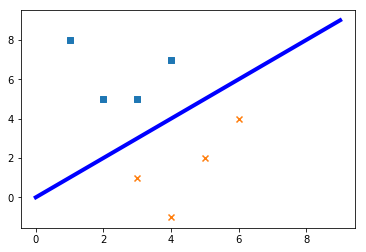

In [3]:
class_0=np.array([X[i] for i in range(len(X)) if y[i]])
class_1=np.array([X[i] for i in range(len(X)) if not y[i]])
plt.scatter(class_0[:,0],class_0[:,1],marker='s')
plt.scatter(class_1[:,0],class_1[:,1],marker='x')
x=range(10)
plt.plot(x,x,'b-',linewidth=4)


## 2.3 建立逻辑回归分类器

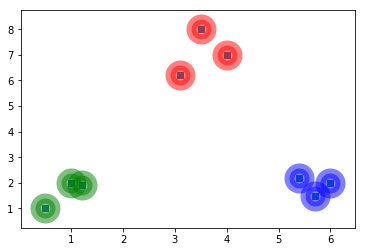

In [4]:
from sklearn import  linear_model

X = np.array([[4, 7], [3.5, 8], [3.1, 6.2], [0.5, 1], [1, 2],
[1.2, 1.9], [6, 2], [5.7, 1.5], [5.4, 2.2]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2])
color=['r','g','b']
classify=linear_model.LogisticRegression(solver='liblinear',C=100)
classify.fit(X,y)

#简单查看数据类别情况
plt.scatter(X[:,0],X[:,1],marker='s')
for i in range(len(X)):
    plt.scatter(X[i,0],X[i,1],s=400,alpha=0.5,color=color[y[i]],linewidths=10,marker='o')

In [5]:
def plot_classify(classifier,X,y):
    #定义数值范围 增加余量1.0
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
    #定义边界，通过网格数据求解方程
    step_size=0.01
    x_values,y_values=np.meshgrid(np.arange(x_min,x_max,step_size),
                                  np.arange(y_min,y_max,step_size))
    #c_ translates slice objects to concat along the second axis
    #ravel() like  np.sqieeze
    mesh_output=classifier.predict(np.c_[x_values.ravel(),y_values.ravel()])
    mesh_output=mesh_output.reshape(x_values.shape)
    
    
    #c=y表示颜色的使用顺序。用目标标记映射cmap的颜色表。我们肯定 希望不同的标记使用不同的颜色，因此，用y作为映射
    plt.figure()
    plt.pcolormesh(x_values,y_values,mesh_output,cmap=plt.cm.hot)
    plt.scatter(X[:,0],X[:,1],c=y,s=80,edgecolors='black',linewidths=1,cmap=plt.cm.Paired)

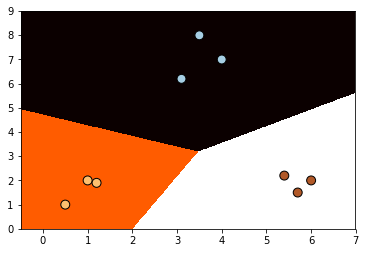

In [6]:
plot_classify(classify,X,y)

## 2.4 建立朴素贝叶斯分类器

In [25]:
from sklearn.naive_bayes import GaussianNB
df=pd.read_csv('data_multivar.txt',header=None)
X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])



In [26]:
classifier_gaussiannb=GaussianNB()
classifier_gaussiannb.fit(X,y)
y_pred=classifier_gaussiannb.predict(X)

acc=(y_pred==y).sum()/X.shape[0]
print(acc)

0.995


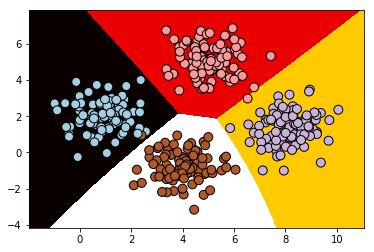

In [27]:
plot_classify(classifier_gaussiannb,X,y)

## 2.5 将数据集分割成训练集和测试集

1.0


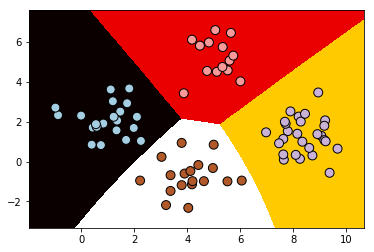

In [29]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



classifier_gaussiannb_new = GaussianNB()
classifier_gaussiannb_new.fit(X_train,y_train)

y_pred=classifier_gaussiannb_new.predict(X_test)
acc=(y_pred==y_test).sum()/y_pred.shape[0]
print(acc)

plot_classify(classifier_gaussiannb_new,X_test,y_test)


## 2.6 用交叉验证检验模型准确性

- 准确率 分类问题中分类正确的占总数的百分比
- 精确率 分类问题中分类正确的正例占所有被正确分类的例子的百分比   **查准率**
- 召回率 分类问题中分类正确的正例占所有正例的百分比      **查全率**

### 2.6.1 准备工作

数据集总样本100个，82个是感兴趣的，分类器最终分出73个，但实际只有65是真正感兴趣的

- 准确率 ： 65
- 精确率 ： 65/73
- 召回率 ： 65/82
- F1-score : 2*pre*recall/(pre+recall)

### 2.6.2 详细步骤

In [36]:
from sklearn import cross_validation
num_validations=5

acc=cross_validation.cross_val_score(classifier_gaussiannb,X,y,scoring='accuracy',cv=num_validations)
print('{:.4f}'.format(acc.mean()))

0.9950


In [48]:
pre=cross_validation.cross_val_score(classifier_gaussiannb,X,y,scoring='accuracy',cv=num_validations)
print('pre:{:.4f}'.format(pre.mean()))
recall=cross_validation.cross_val_score(classifier_gaussiannb,X,y,scoring='recall_weighted',cv=num_validations)
print('recall:{:.4f}'.format(recall.mean()))
f1=cross_validation.cross_val_score(classifier_gaussiannb,X,y,scoring='f1_weighted',cv=num_validations)
print('f1:{:.4f}'.format(f1.mean()))
print('f1:{:.4f}'.format((2*pre*recall/(pre+recall)).mean()))

pre:0.9950
recall:0.9950
f1:0.9950
f1:0.9950


## 2.7 混淆矩阵可视化
混淆矩阵(confusion matrix)是理解分类模型性能的数据表，它有助于我们理解如何把测试 数据分成不同的类。当想对算法进行调优时，就需要在对算法做出改变之前了解数据的错误分类 情况。有些分类效果比其他分类效果更差，混淆矩阵可以帮助我们理解这些问题

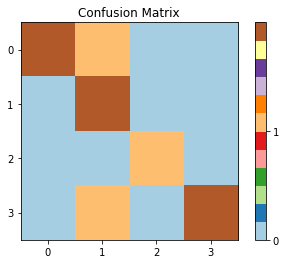

In [65]:
#尝试自己构建混淆矩阵
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
confusion_mat=confusion_matrix(y_true,y_pred)
def plot_confusion_matrix(confusion_mat):
    plt.imshow(confusion_mat,interpolation='nearest',cmap=plt.cm.Paired)
    plt.title('Confusion Matrix')
    plt.colorbar(ticks=np.arange(0,2,1))
#     plt.xticks(np.arange(4),np.arange(4))
    plt.yticks(np.arange(4),np.arange(4))
    
plot_confusion_matrix(confusion_mat)

## 2.8 提取性能报告

In [67]:
from sklearn.metrics import  classification_report
y_true = [1, 0, 0, 2, 1, 0, 3, 3, 3]
y_pred = [1, 1, 0, 2, 1, 0, 1, 3, 3]
target_names = ['Class-0', 'Class-1', 'Class-2', 'Class-3'] 
print(classification_report(y_true, y_pred, target_names=target_names))

             precision    recall  f1-score   support

    Class-0       1.00      0.67      0.80         3
    Class-1       0.50      1.00      0.67         2
    Class-2       1.00      1.00      1.00         1
    Class-3       1.00      0.67      0.80         3

avg / total       0.89      0.78      0.79         9



## 2.9 根据汽车特征评估质量
### 2.9.1 准备工作

In [69]:
#https://archive.ics.uci.edu/ml/datasets/Car+Evaluation
car_df=pd.read_csv('car.csv',header=None)
car_df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [229]:
from sklearn.preprocessing import LabelEncoder

X=car_df.iloc[:,:-1]
# label_encoder= [type('LabelEncoder', (object,), dict(foo=LabelEncoder)) for i in range(6)]
label_encoder=[LabelEncoder() for i in range(6)]
for i,item in enumerate(X.columns):
    X[item]=label_encoder[i].fit_transform(y=(X[item]))
X.head()

/usr/local/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,0,1,2,3,4,5
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [230]:
X=X.iloc[:,:-1].astype(int)
y=X.iloc[:,-1].astype(int)

In [231]:
from sklearn.ensemble import  RandomForestClassifier
params = {'n_estimators': 200, 'max_depth': 8, 'random_state': 7} 
classifier = RandomForestClassifier(**params)
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [232]:
acc=cross_validation.cross_val_score(classifier,X,y,scoring='accuracy',cv=3)
print('Accuracy:{:.2f}%'.format(acc.mean()*100))

Accuracy:100.00%


In [250]:
input_data = ['vhigh', 'vhigh', '2', '2', 'small'] 
input_data_encoded = [-1] * len(input_data)
for i,item in enumerate(input_data):
    input_data_encoded[i] = int(label_encoder[i].transform([input_data[i]])) 
input_data_encoded = np.array(input_data_encoded).reshape(1,-1)

In [251]:
output_class = classifier.predict(input_data_encoded)
print ("Output class:", label_encoder[-1].inverse_transform(output_class)[0])

Output class: med


/usr/local/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [243]:
label_encoder[1].transform(['vhigh'])

array([3])